# KITTI: Change color of a car

In [7]:
from PIL import Image
import numpy as np
import scipy.misc as sp
from IPython.display import display
from PIL import ImageEnhance

from tools import image_utils

DATASET = "../../dataset/kitti_data_semantics"
EXAMPLE_FRAME = "000045_10" # contains 2 cars
semantic_label_car = 26 # car

## Input

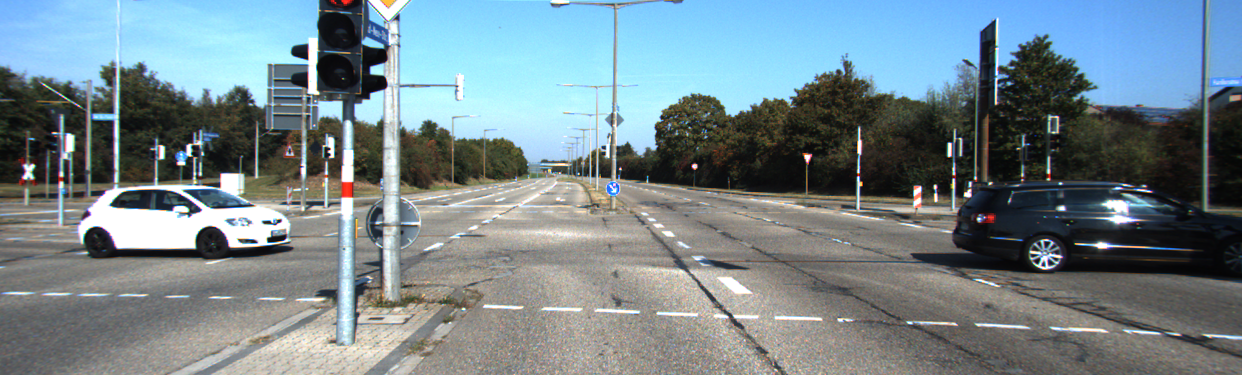

In [5]:
image = Image.open(f'{DATASET}/training/image_2/{EXAMPLE_FRAME}.png')
image_np = np.asarray(image)
display(image)

## Change color of cars using **semantic masks**
Semantic mask does not allow adjusting colors, brightness per instance, but it can be only applied on class level.

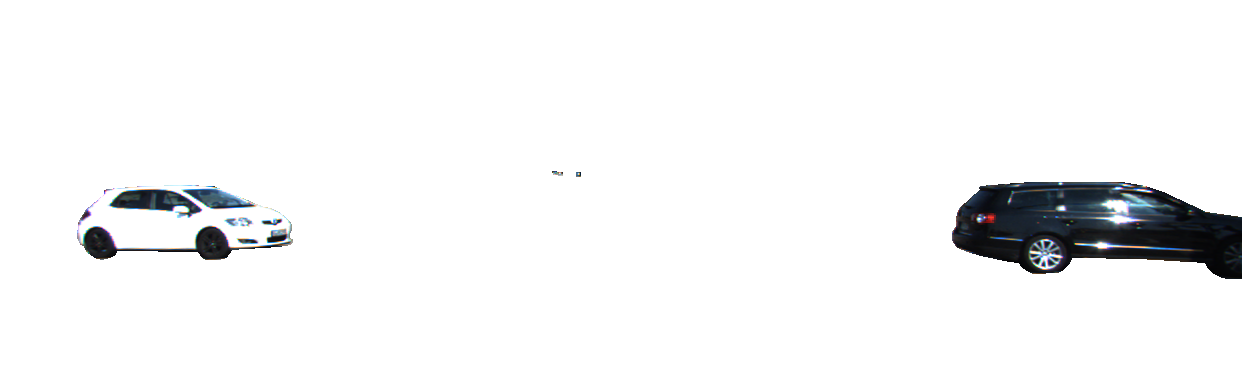

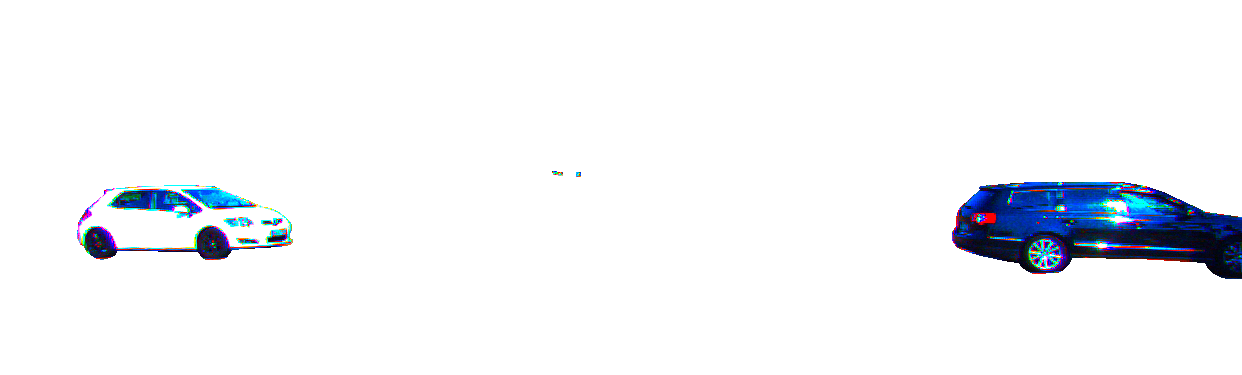

In [13]:
mask_semantic = Image.open(f'{DATASET}/training/semantic/{EXAMPLE_FRAME}.png')
mask_semantic_np = np.asarray(mask_semantic)
# Convert 2D mask to 3D to be used with RGB image
mask_semantic_3d = image_utils.convert_2d_mask_to_3d(mask_semantic_np)

# Create mask for car
mask_car = np.where(mask_semantic_3d != semantic_label_car, image_np*0,np.ones_like(image_np)*255)

# Cut masked area
masked_cars = Image.fromarray(np.zeros_like(image_np))
masked_cars.paste(image, (0, 0), Image.fromarray(mask_car).convert('L'))

# Make transparent
transparent_mask = image_utils.make_transparent(masked_cars, (0,0,0))
display(transparent_mask)

# Change color of cars
enhancer = ImageEnhance.Color(transparent_mask)
factor = 10
colored_cars = enhancer.enhance(factor)
display(colored_cars)

### See changes on original background

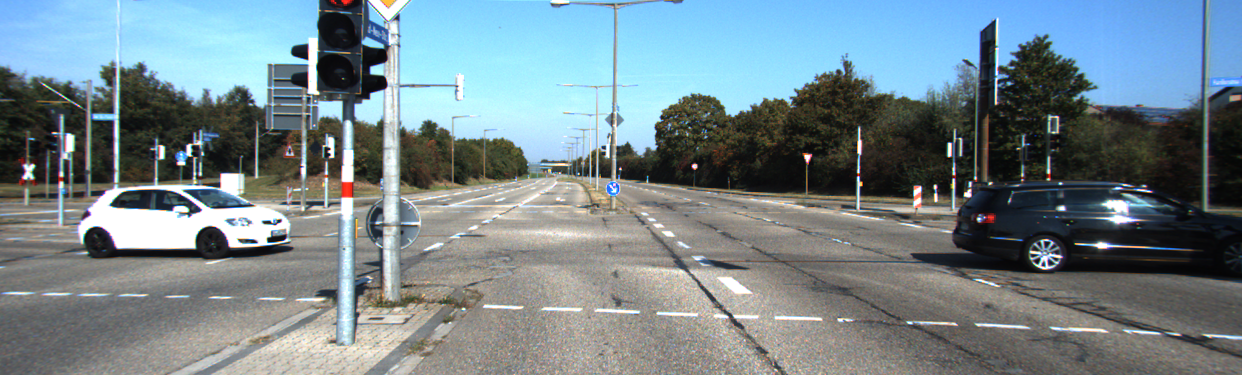

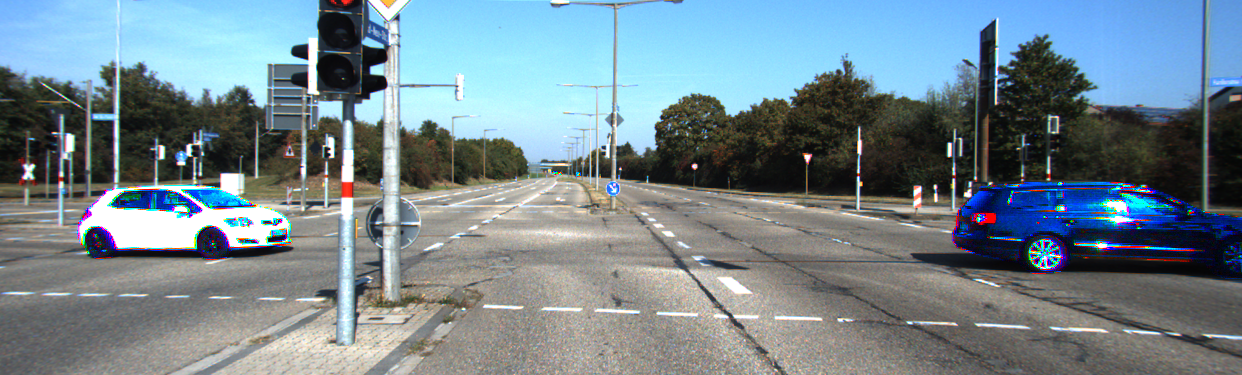

In [14]:
colored_background = image.copy()
colored_background.paste(colored_cars, (0,0), colored_cars)

display(image)
display(colored_background)

## Change color of cars using **instance masks**

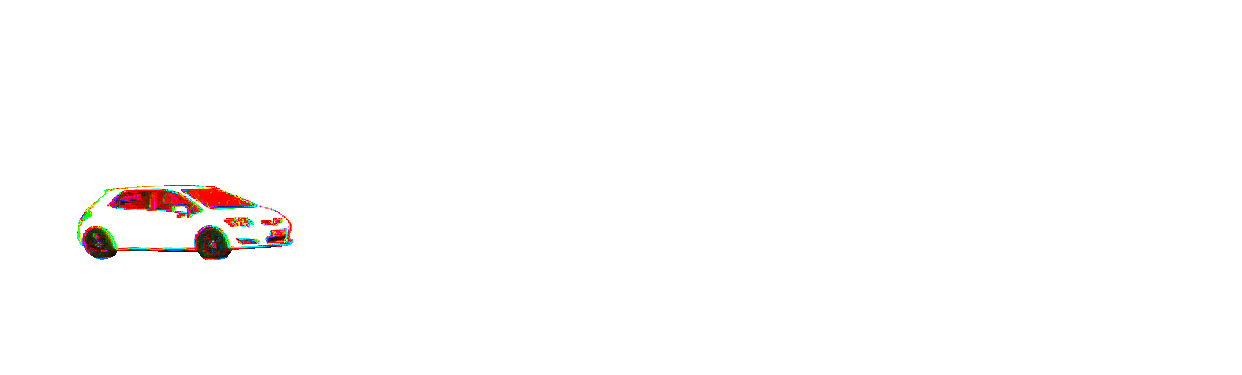

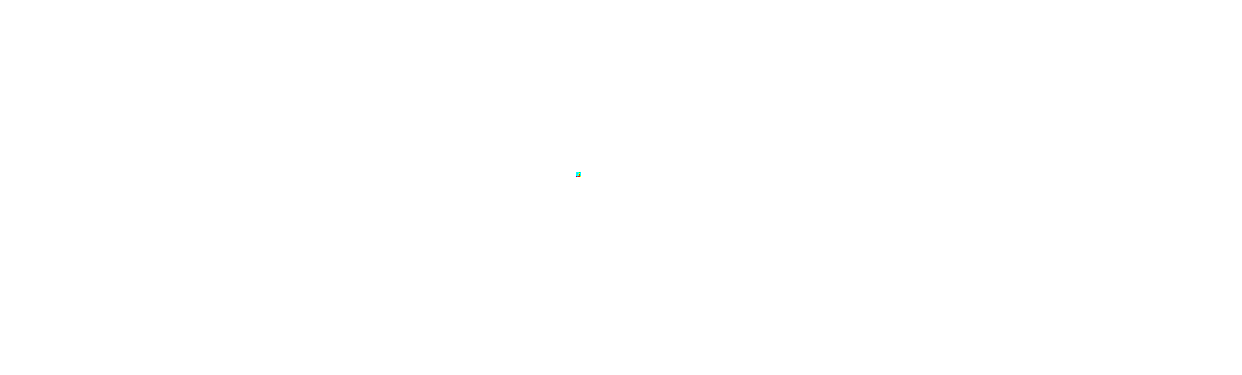

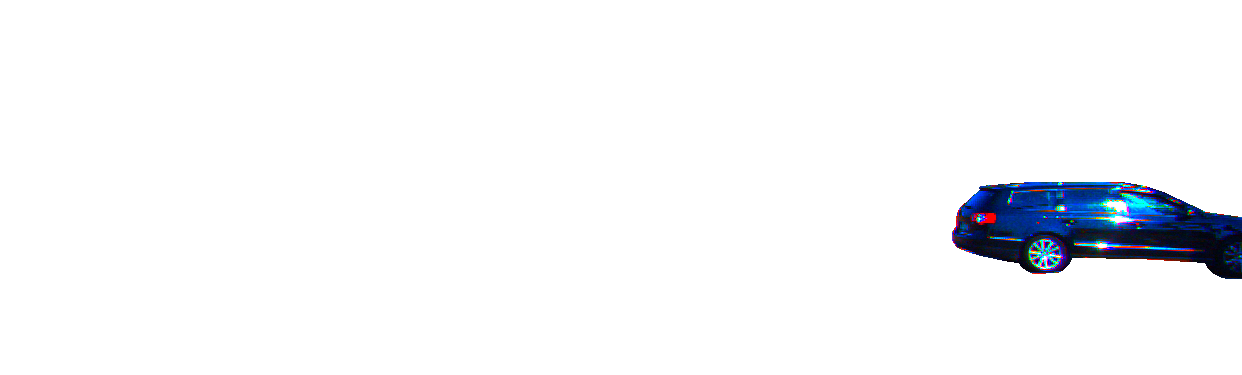

In [24]:
mask_instance = Image.open(f'{DATASET}/training/instance/{EXAMPLE_FRAME}.png')
mask_instance_np = np.asarray(mask_instance)
# Convert 2D mask to 3D to be used with RGB image
mask_instance_np_3d = image_utils.convert_2d_mask_to_3d(mask_instance_np)

max_instance_count = 20 # maximum number of instance to search
unique_instance_values = np.unique(mask_instance_np_3d)
color_factors = [0, -20, 100, 8, 100, -10]

colored_cars = []
for i in range(1,max_instance_count+1):
    instance_value = semantic_label_car*256 + i # First 8bits represent label, remaining bits represent instance number

    # Skip instances are not car
    if instance_value not in unique_instance_values:
        continue

    # Create mask for car
    mask_car = np.where(mask_instance_np_3d != instance_value, image_np*0,np.ones_like(image_np)*255)

    # Cut masked area
    masked_car = Image.fromarray(np.zeros_like(image_np))
    masked_car.paste(image, (0, 0), Image.fromarray(mask_car).convert('L'))

    # Make transparent
    transparent_mask = image_utils.make_transparent(masked_car, (0,0,0))

    # Change color of cars
    enhancer = ImageEnhance.Color(transparent_mask)
    factor = color_factors[i]
    colored_car = enhancer.enhance(factor)
    colored_cars.append(colored_car)
    display(colored_car)

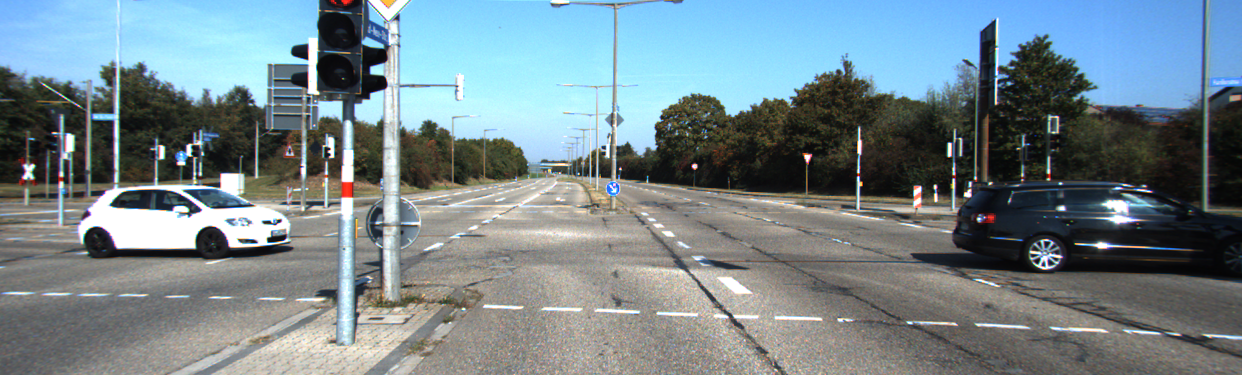

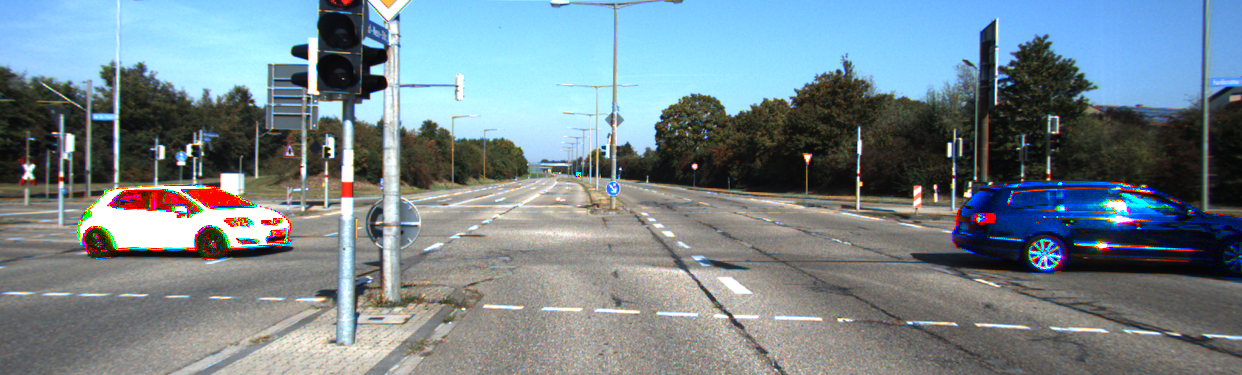

In [25]:
colored_background = image.copy()
for colored_car in colored_cars:
    colored_background.paste(colored_car, (0,0), colored_car)

display(image)
display(colored_background)